In [30]:
import pm4py

def vis_write_ocel(scene:str, filter:bool, event_filter:bool, process_instance:str, objects:list, events:list):
    ## scene: scene number
    ## filter: check if scene should be split in smaller cases
    ## process_instance: nai - New asset inventory / adtc - Asset disbursement to clients / ssaco - self-service asset check-out
    ## objects: objects which should be excluded to filter
    
    video_log_ocel = pm4py.read_ocel_json(f'../scene{scene}/scene{scene}_video_ocel.json')

    if filter == False:
        ### OCEL
        # Visualize
        ocel_vis = pm4py.ocel.discover_ocdfg(video_log_ocel)
        pm4py.vis.view_ocdfg(ocel_vis)
        
        print(video_log_ocel)

        
        # Write
        # ocel_path = f'../dataProcessing/filteredSceneVideoOCEL/filtered_scene{scene}_video_ocel_{process_instance}'
        # pm4py.write_ocel_json(video_log_ocel, ocel_path)
    
    else:
        ### OCEL
        # Visualize
        filtered_ocel = pm4py.filtering.filter_ocel_objects(video_log_ocel, object_identifiers=objects, positive=False, level=2)
        
        if event_filter == True:
            filtered_ocel_event = pm4py.filtering.filter_ocel_event_attribute(filtered_ocel,attribute_key='ocel:activity',attribute_values=events,positive=False)
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel_event)
            pm4py.vis.view_ocdfg(ocel_vis)
            
            print(filtered_ocel_event)

            # Write
            # ocel_path = f'../dataProcessing/filteredSceneVideoOCEL/filtered_scene{scene}_video_ocel_{process_instance}'
            # pm4py.write_ocel_json(filtered_ocel_event,ocel_path)
        else:
            ocel_vis = pm4py.ocel.discover_ocdfg(filtered_ocel)
            pm4py.vis.view_ocdfg(ocel_vis)
        
            print(filtered_ocel)

            # Write
            # ocel_path = f'../dataProcessing/filteredSceneVideoOCEL/filtered_scene{scene}_video_ocel_{process_instance}'
            # pm4py.write_ocel_json(filtered_ocel,ocel_path)

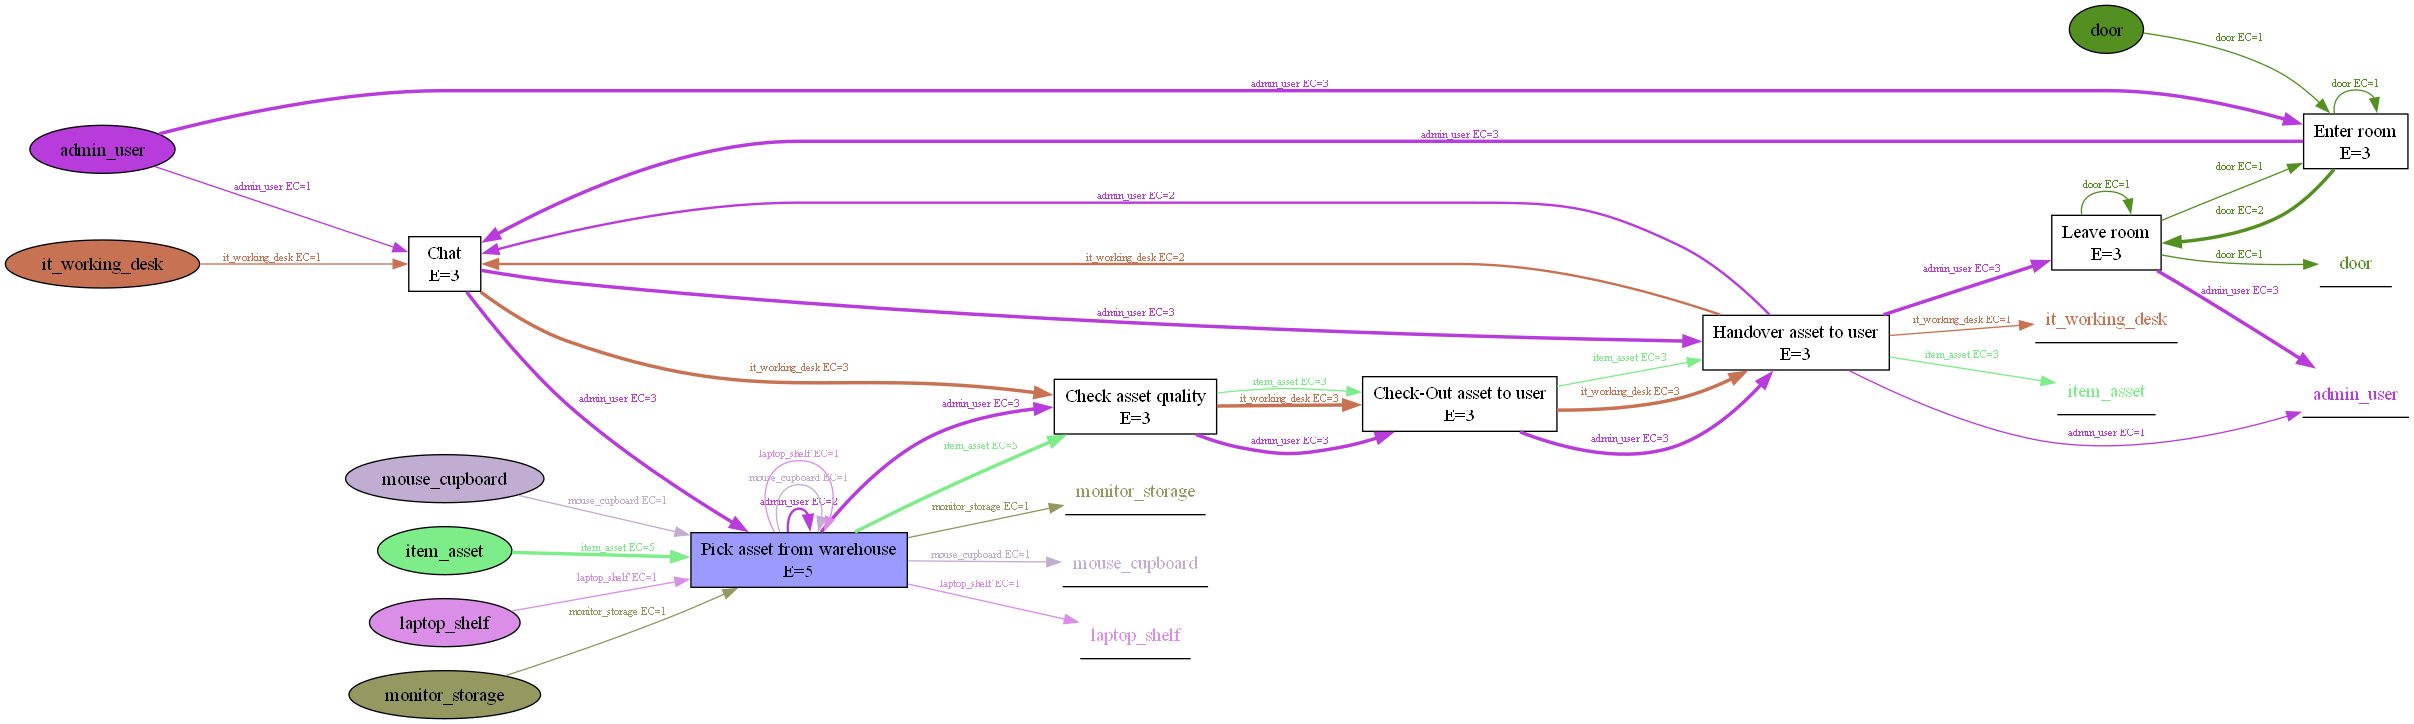

Object-Centric Event Log (number of events: 23, number of objects: 14, number of activities: 7, number of object types: 7, events-objects relationships: 72)
Activities occurrences: {'Pick asset from warehouse': 5, 'Enter room': 3, 'Chat': 3, 'Check asset quality': 3, 'Check-Out asset to user': 3, 'Handover asset to user': 3, 'Leave room': 3}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'door': 1, 'it_working_desk': 1, 'laptop_shelf': 1, 'mouse_cupboard': 1, 'monitor_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [31]:
vis_write_ocel('01', False, False, 'adtc', [], [])

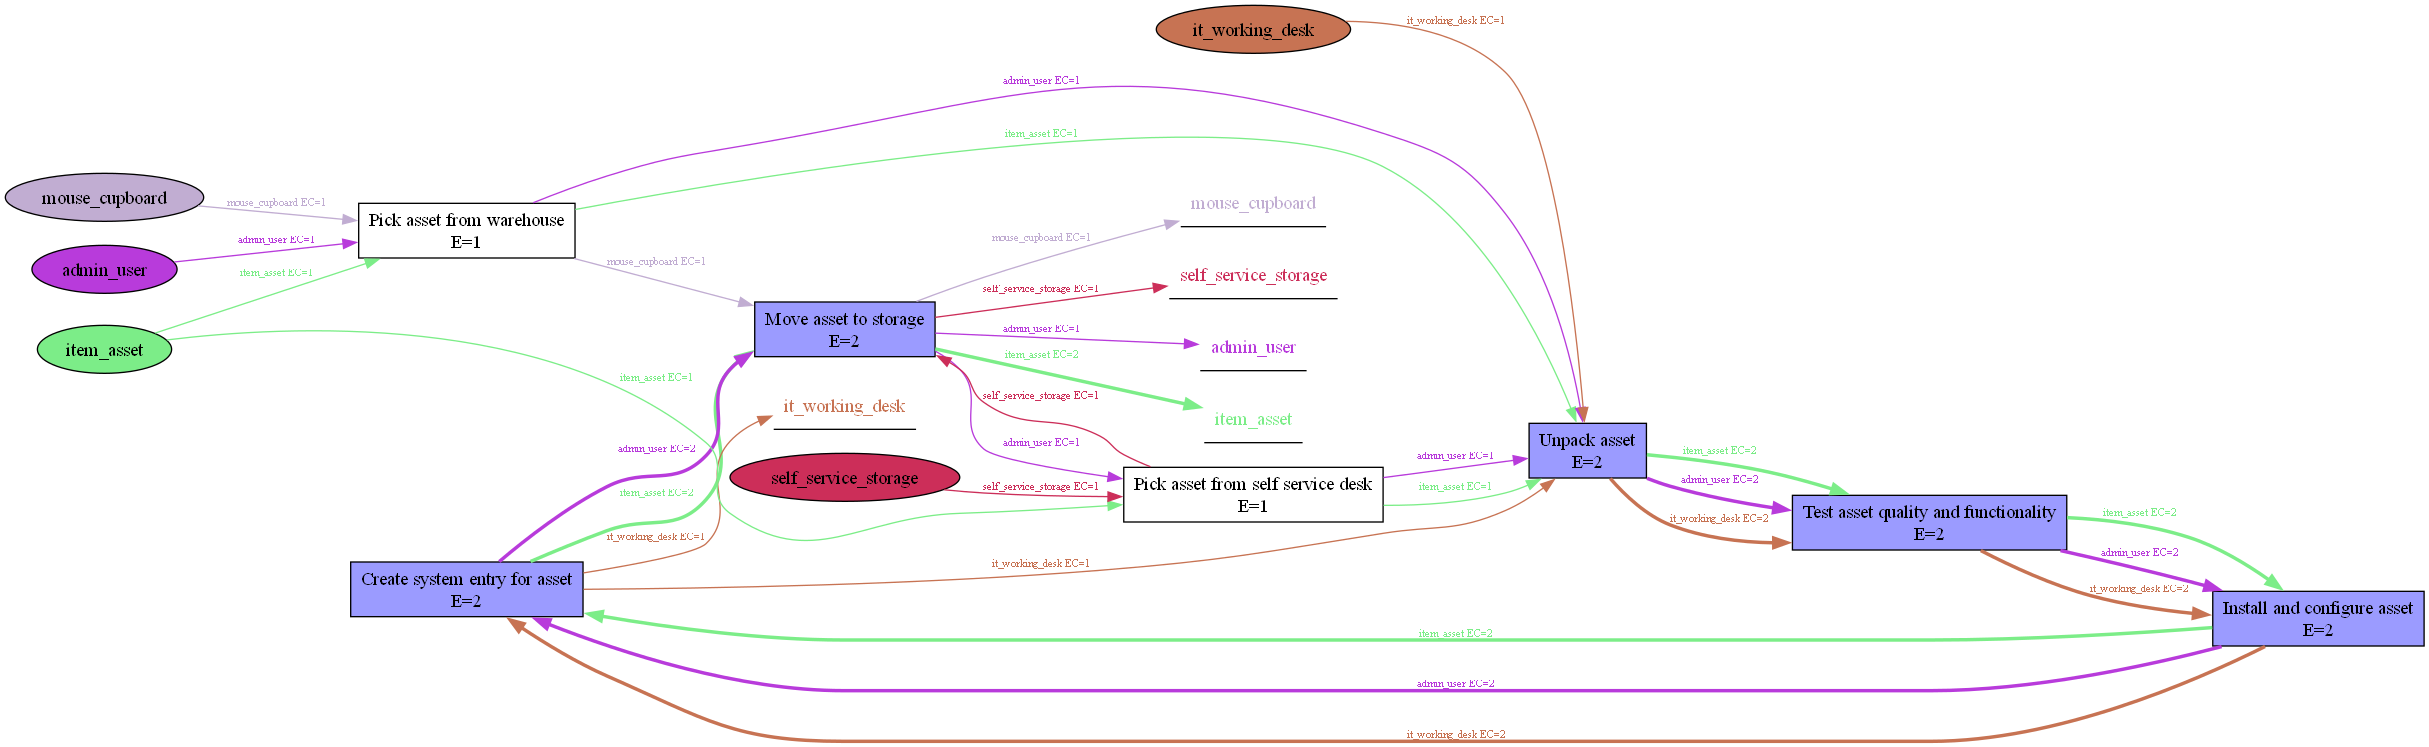

Object-Centric Event Log (number of events: 12, number of objects: 6, number of activities: 7, number of object types: 5, events-objects relationships: 36)
Activities occurrences: {'Unpack asset': 2, 'Test asset quality and functionality': 2, 'Install and configure asset': 2, 'Move asset to storage': 2, 'Create system entry for asset': 2, 'Pick asset from warehouse': 1, 'Pick asset from self service desk': 1}
Object types occurrences (number of objects): {'item_asset': 2, 'admin_user': 1, 'mouse_cupboard': 1, 'it_working_desk': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [32]:
vis_write_ocel('02',False, False, 'nai', [], [])

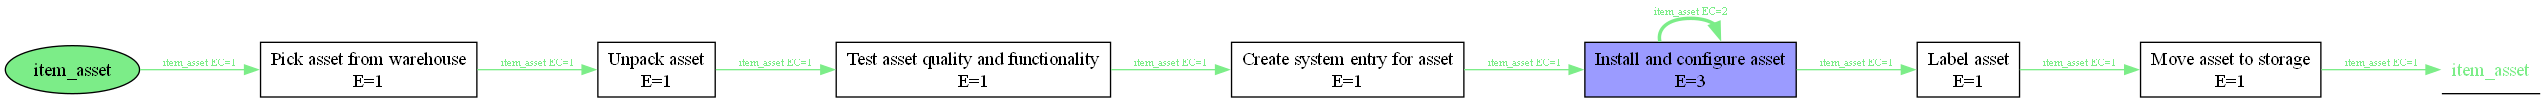

Object-Centric Event Log (number of events: 9, number of objects: 1, number of activities: 7, number of object types: 1, events-objects relationships: 9)
Activities occurrences: {'Install and configure asset': 3, 'Unpack asset': 1, 'Pick asset from warehouse': 1, 'Test asset quality and functionality': 1, 'Create system entry for asset': 1, 'Label asset': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


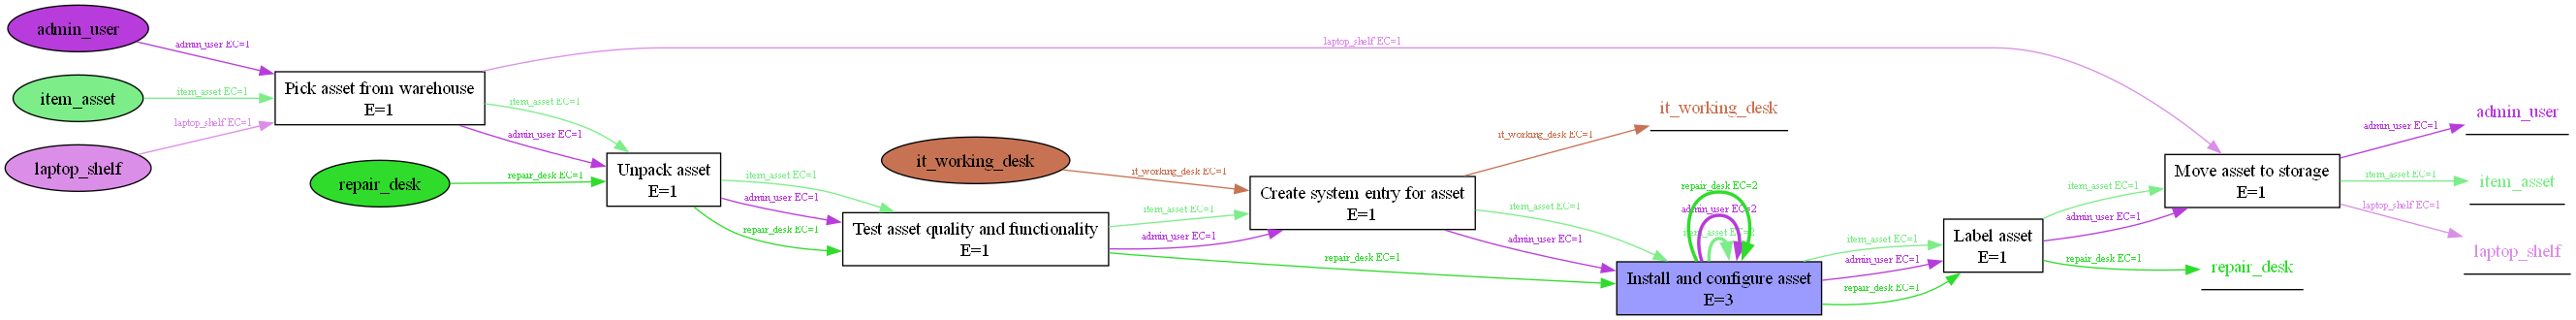

In [49]:
vis_write_ocel('03',True,False,'nai',['L1','L3','C1','C5','K1','C6','H4'],[])
# some of relevant objects like admin_user or repair_desk were excluded after the filter
# -> manually add these into the jsonocel file and visualize using non-function

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene03_video_ocel_nai.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

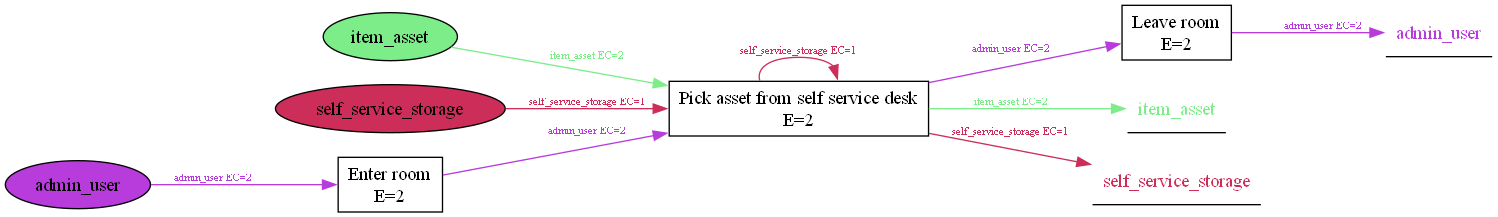

Object-Centric Event Log (number of events: 6, number of objects: 5, number of activities: 3, number of object types: 3, events-objects relationships: 10)
Activities occurrences: {'Enter room': 2, 'Pick asset from self service desk': 2, 'Leave room': 2}
Object types occurrences (number of objects): {'admin_user': 2, 'item_asset': 2, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [34]:
vis_write_ocel('03',True,False,'ssaco',['L1','L3','C1','A1','L5'],[])

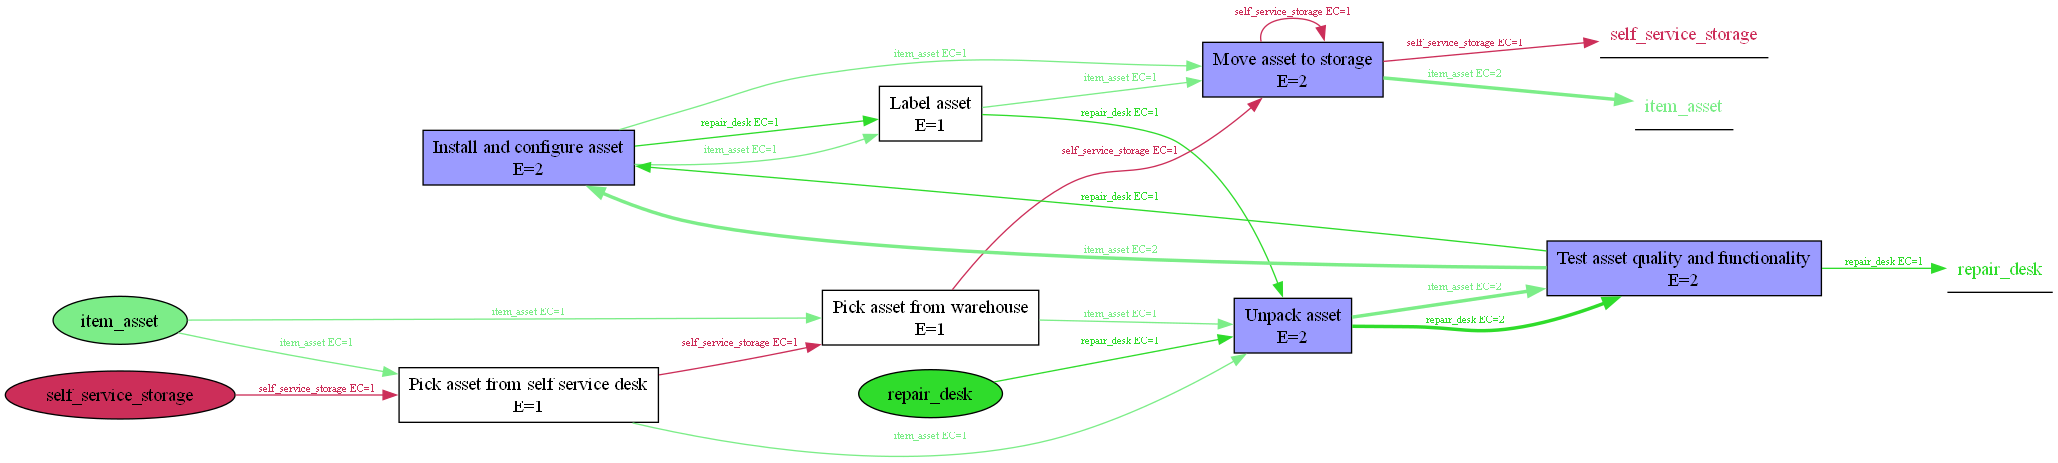

Object-Centric Event Log (number of events: 11, number of objects: 4, number of activities: 7, number of object types: 3, events-objects relationships: 21)
Activities occurrences: {'Unpack asset': 2, 'Install and configure asset': 2, 'Test asset quality and functionality': 2, 'Move asset to storage': 2, 'Pick asset from self service desk': 1, 'Pick asset from warehouse': 1, 'Label asset': 1}
Object types occurrences (number of objects): {'item_asset': 2, 'self_service_storage': 1, 'repair_desk': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


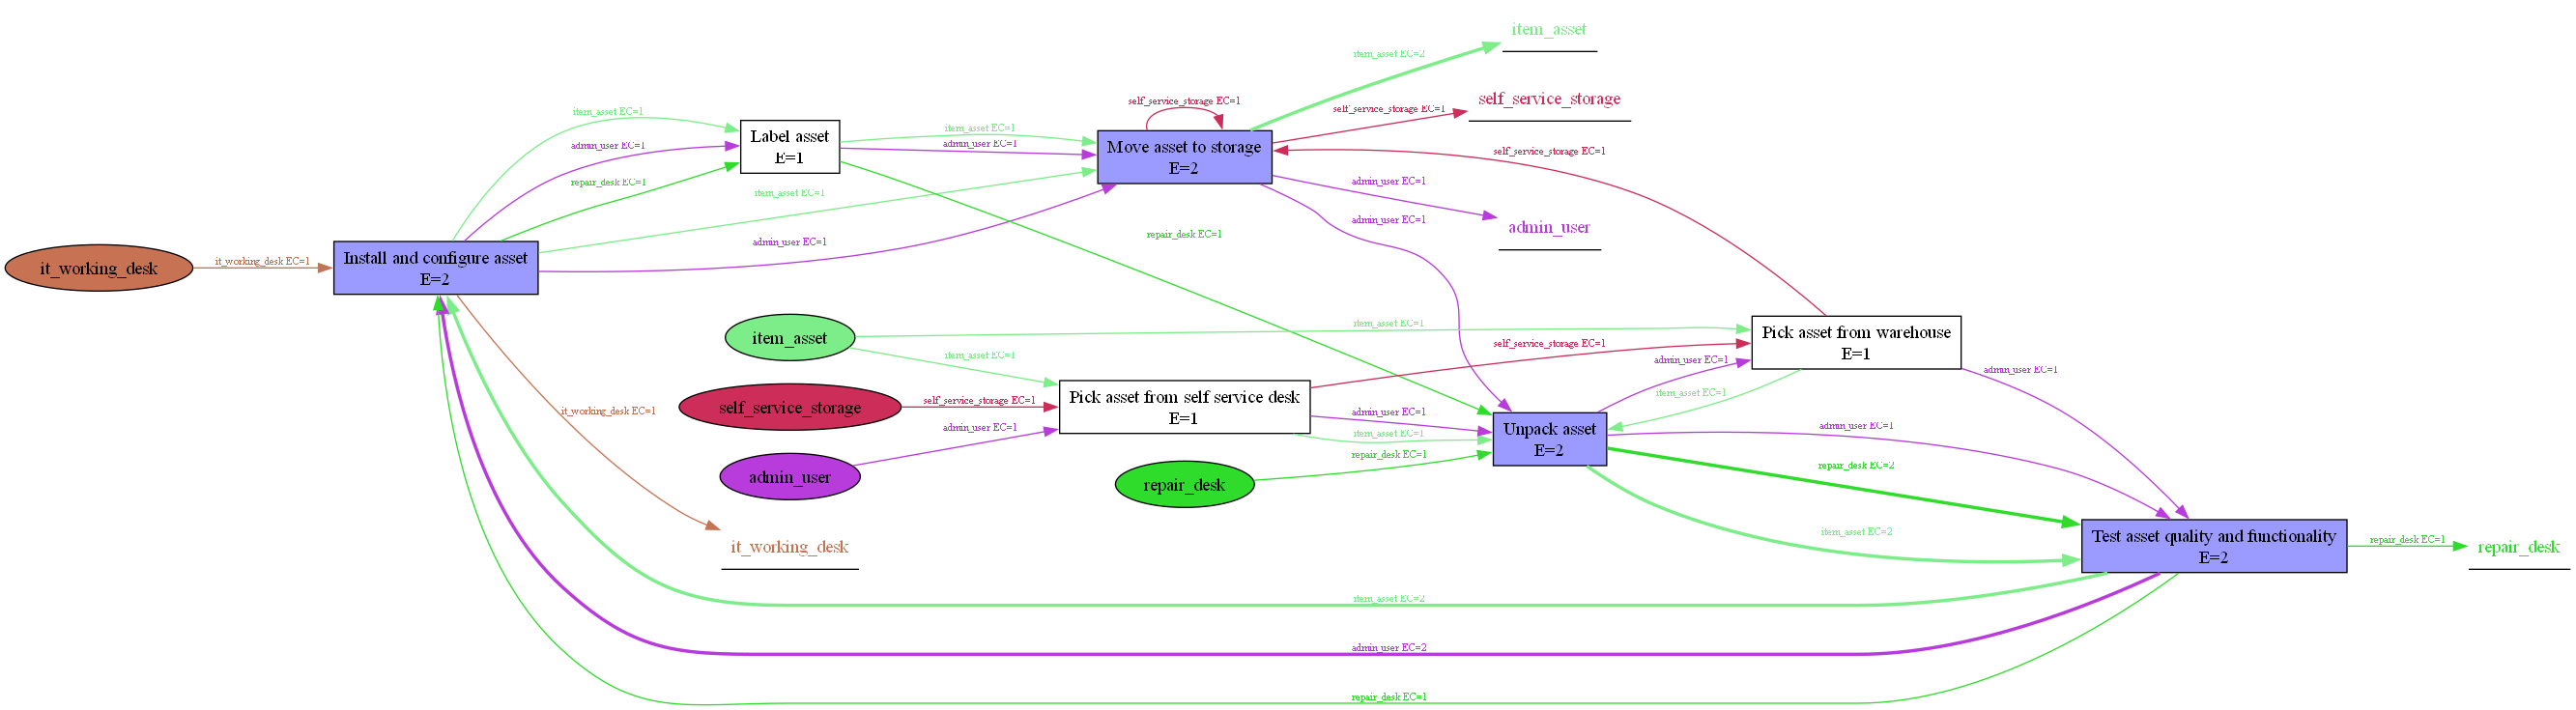

In [52]:
vis_write_ocel('04',True,False,'nai',['M1','C2'],[])
# here also admin_user and it_working_desk went lost after the filter

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene04_video_ocel_nai.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

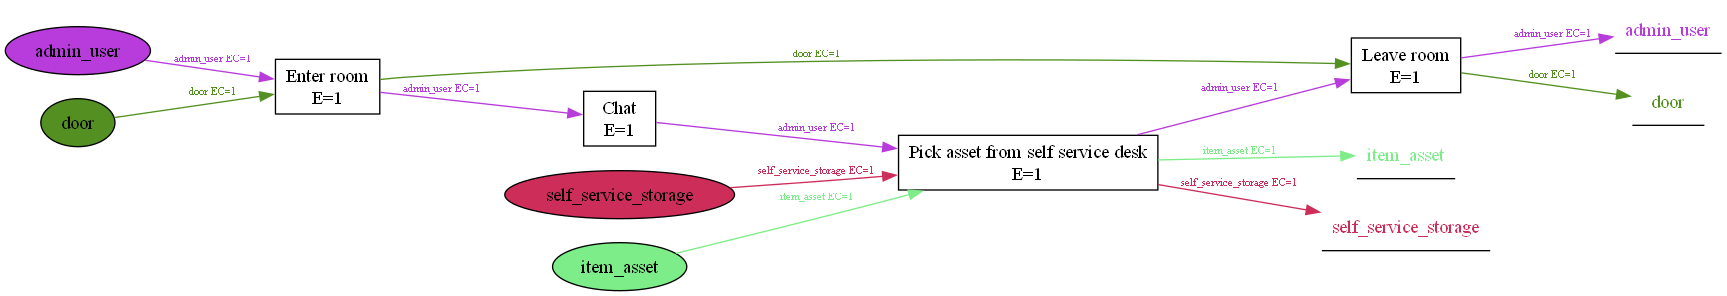

Object-Centric Event Log (number of events: 4, number of objects: 4, number of activities: 4, number of object types: 4, events-objects relationships: 8)
Activities occurrences: {'Enter room': 1, 'Chat': 1, 'Pick asset from self service desk': 1, 'Leave room': 1}
Object types occurrences (number of objects): {'admin_user': 1, 'door': 1, 'item_asset': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [36]:
vis_write_ocel('05',True,True,'ssaco',['L1'],['Open window','other, see notes'])

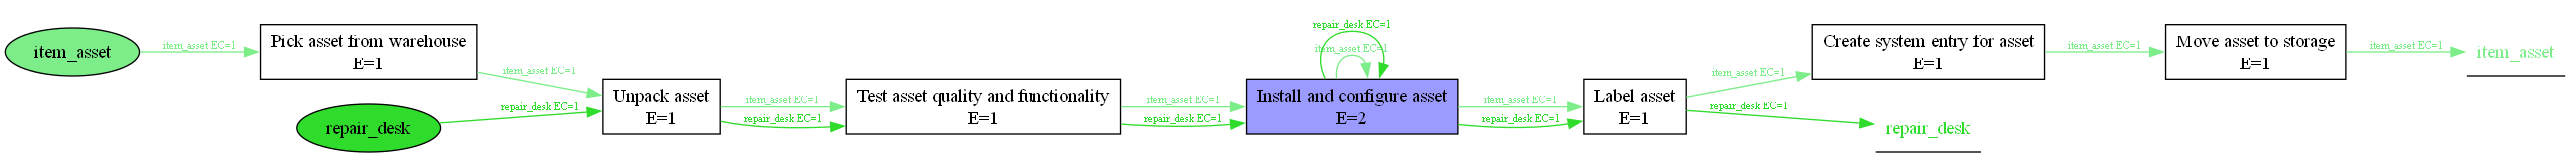

Object-Centric Event Log (number of events: 8, number of objects: 2, number of activities: 7, number of object types: 2, events-objects relationships: 13)
Activities occurrences: {'Install and configure asset': 2, 'Unpack asset': 1, 'Pick asset from warehouse': 1, 'Test asset quality and functionality': 1, 'Label asset': 1, 'Create system entry for asset': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 1, 'repair_desk': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


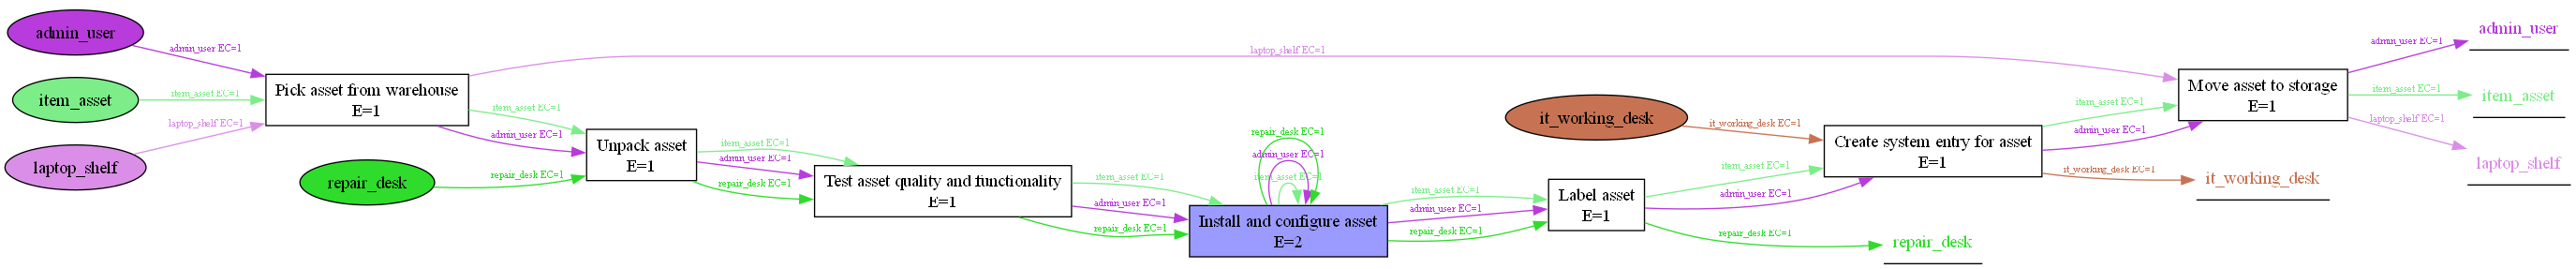

In [53]:
vis_write_ocel('06',True,False,'nai',['C1', 'L3', 'P2','C10', 'H11','C9','K4'],[])
# here laptop_shelf, admin_user and it_working_desk were missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene06_video_ocel_nai.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

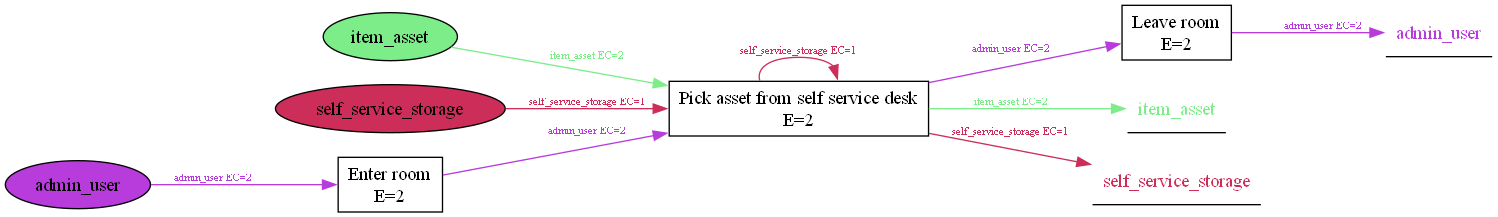

Object-Centric Event Log (number of events: 6, number of objects: 5, number of activities: 3, number of object types: 3, events-objects relationships: 10)
Activities occurrences: {'Enter room': 2, 'Pick asset from self service desk': 2, 'Leave room': 2}
Object types occurrences (number of objects): {'admin_user': 2, 'item_asset': 2, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


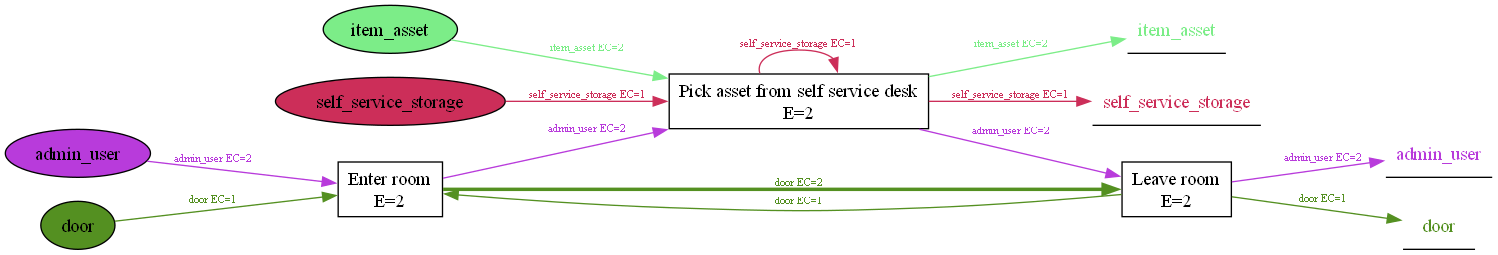

In [54]:
vis_write_ocel('06',True,False,'ssaco',['C1', 'L3', 'P2', 'A1', 'L6'],[])
# door was missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene06_video_ocel_ssaco.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

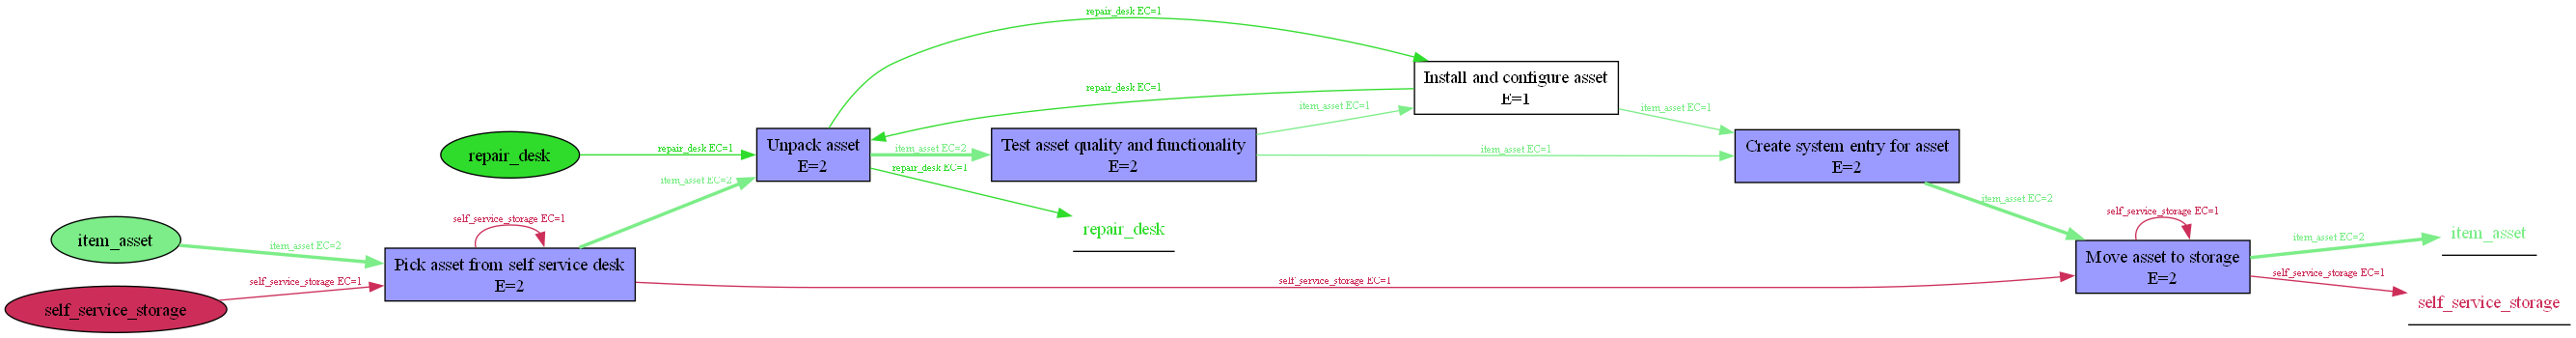

Object-Centric Event Log (number of events: 11, number of objects: 4, number of activities: 6, number of object types: 3, events-objects relationships: 18)
Activities occurrences: {'Pick asset from self service desk': 2, 'Unpack asset': 2, 'Test asset quality and functionality': 2, 'Create system entry for asset': 2, 'Move asset to storage': 2, 'Install and configure asset': 1}
Object types occurrences (number of objects): {'item_asset': 2, 'self_service_storage': 1, 'repair_desk': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


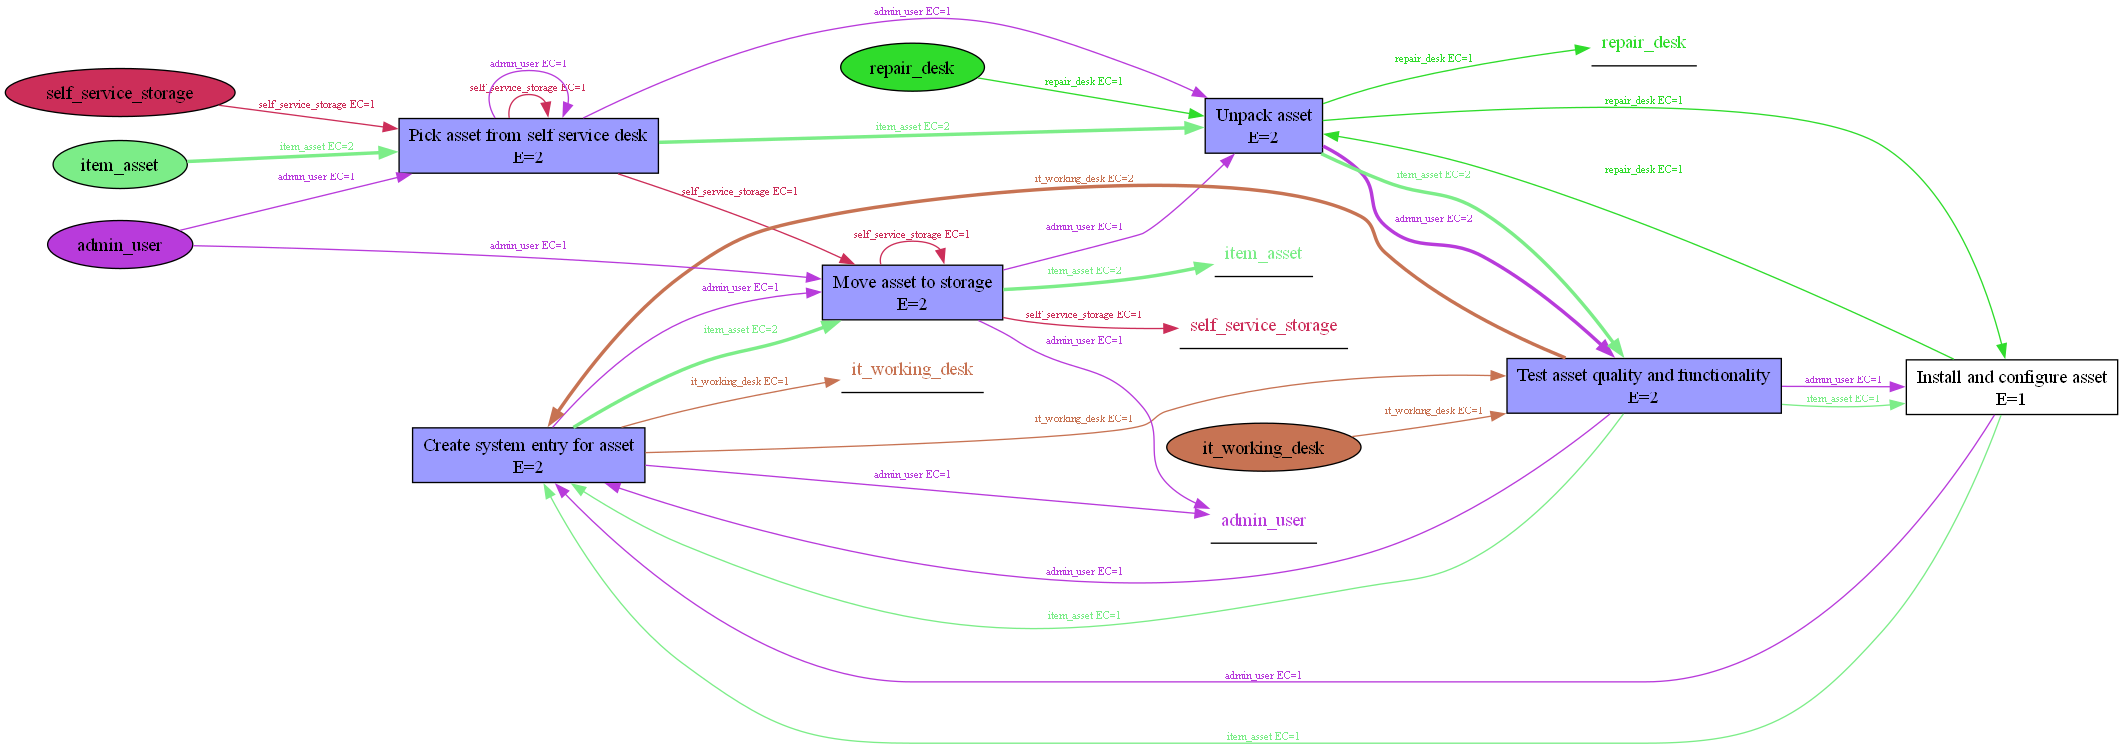

In [55]:
vis_write_ocel('07',True,True,'nai',['L5'],['Enter room','Leave room'])
# admin_user and it_working_desk missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene07_video_ocel_nai.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

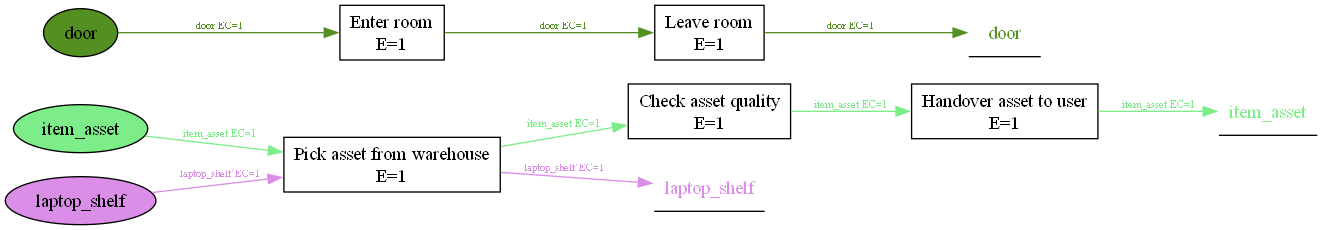

Object-Centric Event Log (number of events: 5, number of objects: 3, number of activities: 5, number of object types: 3, events-objects relationships: 6)
Activities occurrences: {'Enter room': 1, 'Pick asset from warehouse': 1, 'Check asset quality': 1, 'Handover asset to user': 1, 'Leave room': 1}
Object types occurrences (number of objects): {'door': 1, 'item_asset': 1, 'laptop_shelf': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


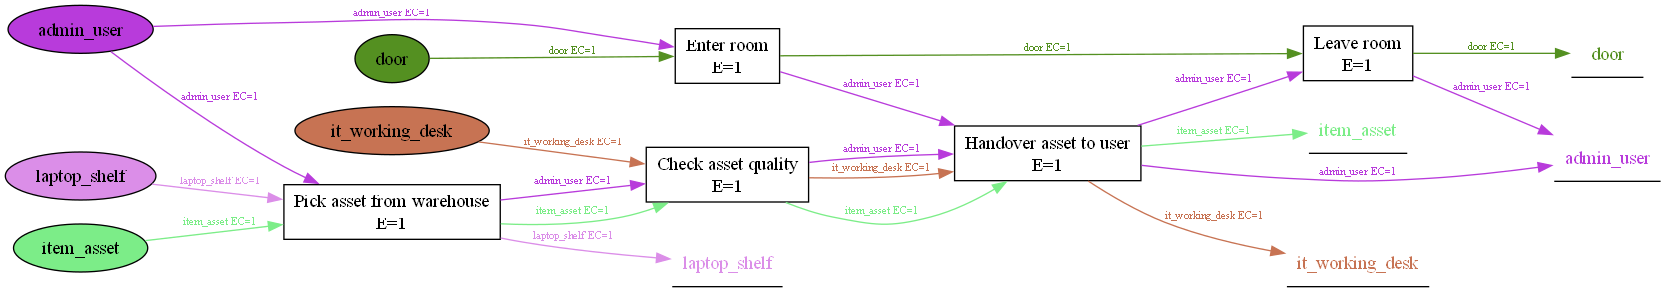

In [56]:
vis_write_ocel('07',True,False,'adtc',['K2', 'H3'],[])
# admin_user and it_working_desk missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene07_video_ocel_adtc.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

#### Exclude scene 8, because in which the process instances are not relevant to Thema 5

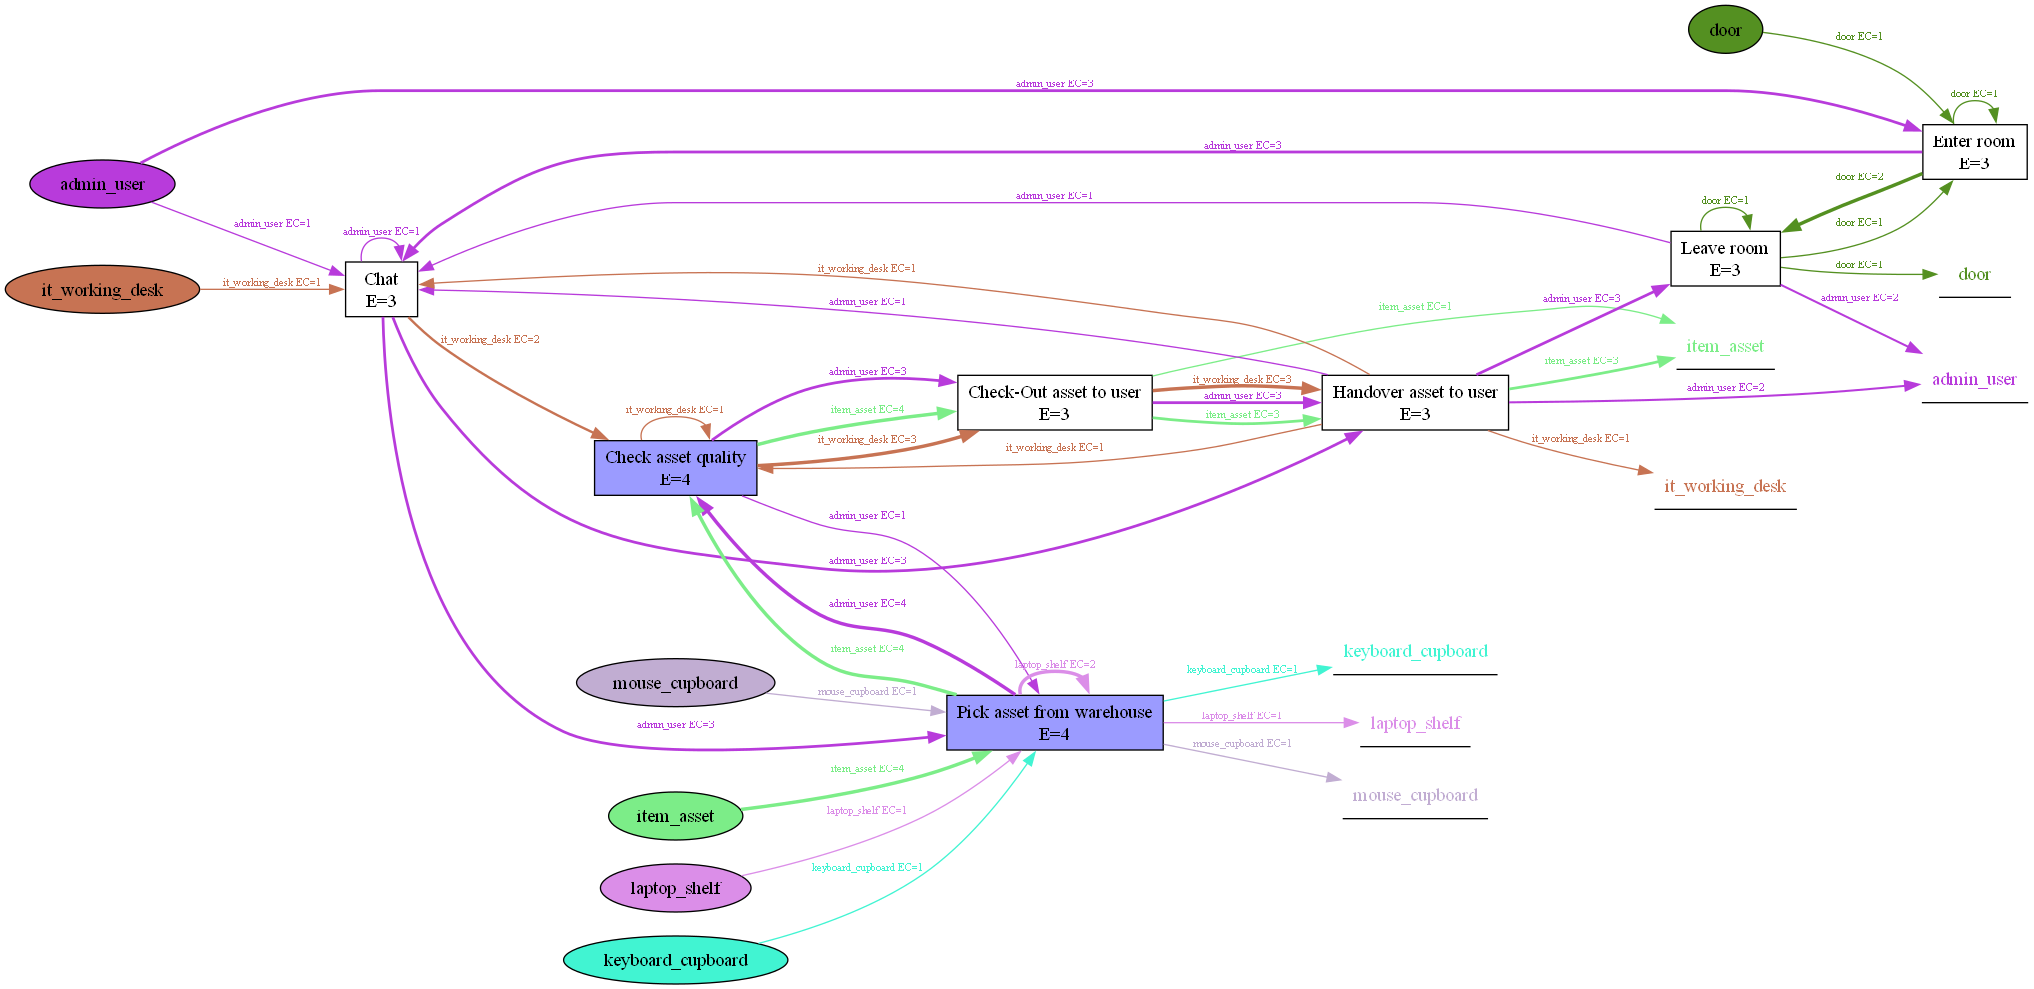

Object-Centric Event Log (number of events: 23, number of objects: 14, number of activities: 7, number of object types: 7, events-objects relationships: 71)
Activities occurrences: {'Pick asset from warehouse': 4, 'Check asset quality': 4, 'Enter room': 3, 'Chat': 3, 'Check-Out asset to user': 3, 'Handover asset to user': 3, 'Leave room': 3}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 4, 'door': 1, 'it_working_desk': 1, 'laptop_shelf': 1, 'mouse_cupboard': 1, 'keyboard_cupboard': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


In [41]:
vis_write_ocel('09',False,False,'adtc',[],[])

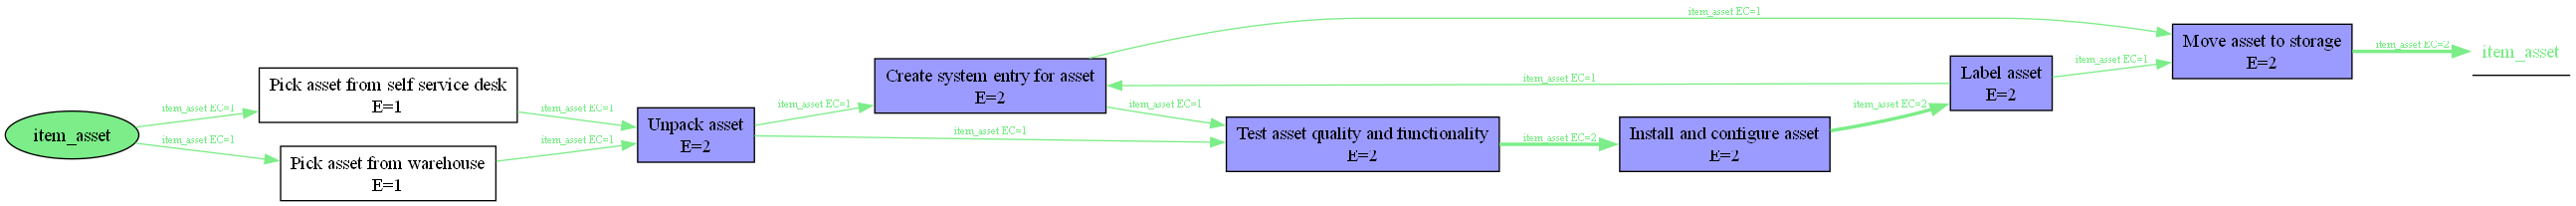

Object-Centric Event Log (number of events: 14, number of objects: 2, number of activities: 8, number of object types: 1, events-objects relationships: 14)
Activities occurrences: {'Unpack asset': 2, 'Test asset quality and functionality': 2, 'Install and configure asset': 2, 'Label asset': 2, 'Move asset to storage': 2, 'Create system entry for asset': 2, 'Pick asset from self service desk': 1, 'Pick asset from warehouse': 1}
Object types occurrences (number of objects): {'item_asset': 2}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


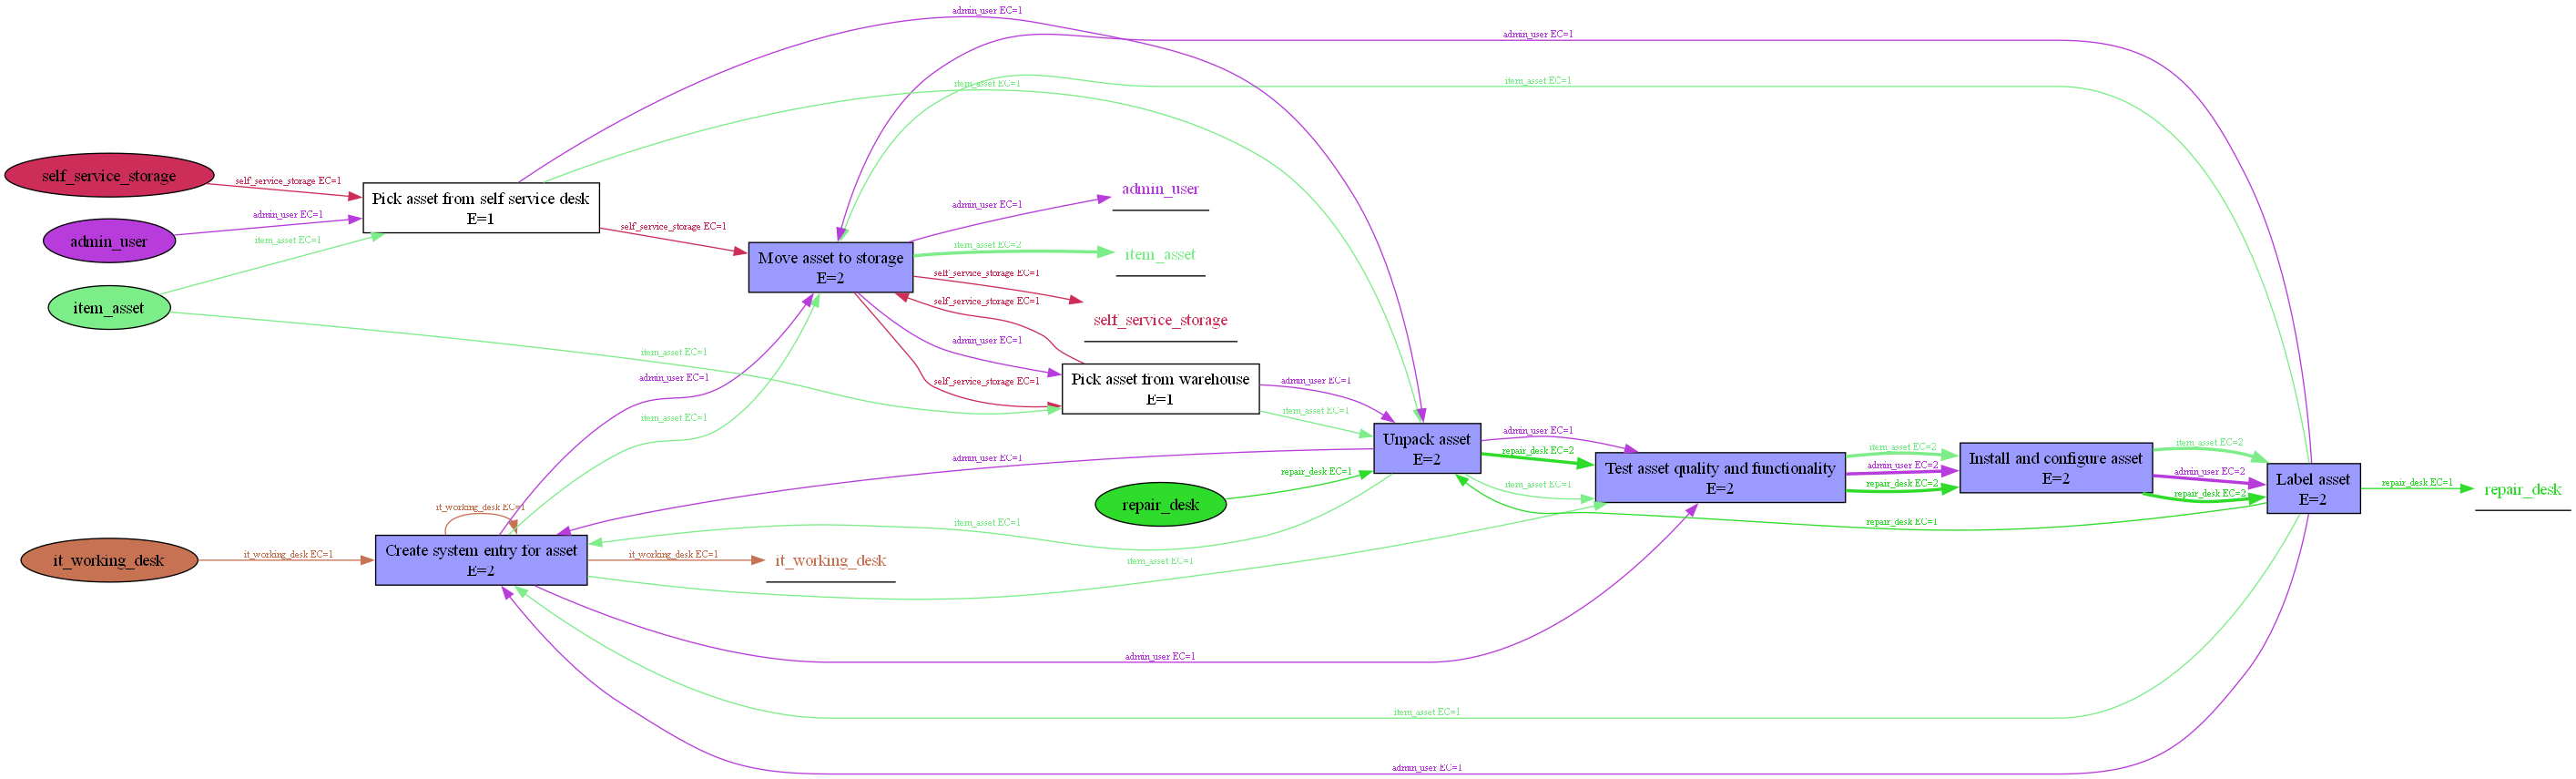

In [57]:
vis_write_ocel('10',True,False,'nai',['K1'],[])
# admin_user, self_service_storage, repair_desk, it_working_desk

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene10_video_ocel_nai.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

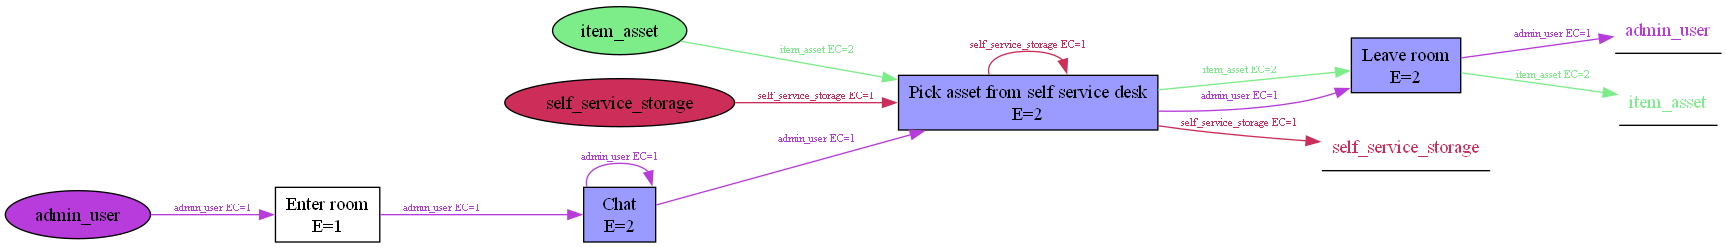

Object-Centric Event Log (number of events: 7, number of objects: 4, number of activities: 4, number of object types: 3, events-objects relationships: 11)
Activities occurrences: {'Pick asset from self service desk': 2, 'Leave room': 2, 'Chat': 2, 'Enter room': 1}
Object types occurrences (number of objects): {'item_asset': 2, 'admin_user': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


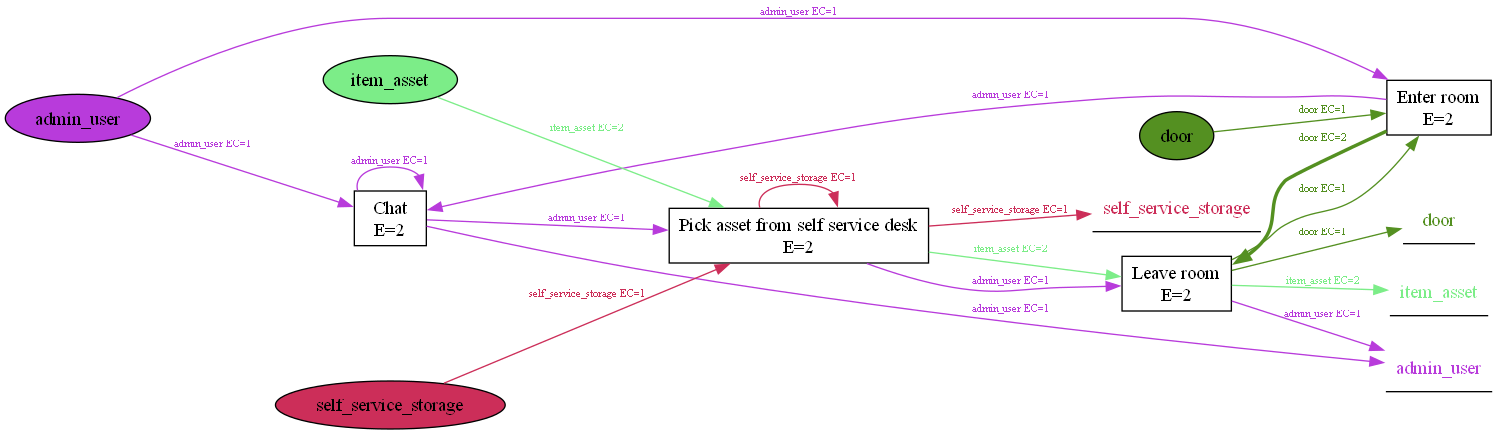

In [58]:
vis_write_ocel('11',True,False,'ssaco',['L1', 'L4'],[])
# door missed


read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene11_video_ocel_ssaco.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

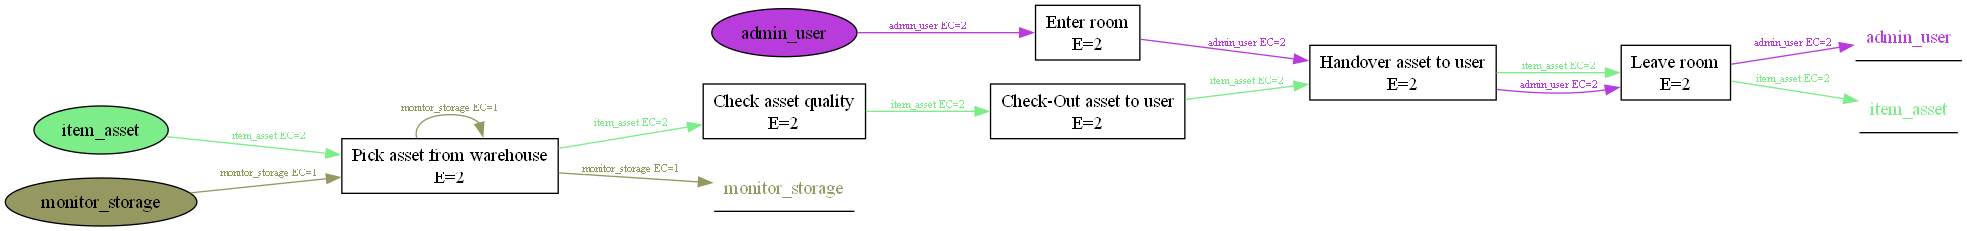

Object-Centric Event Log (number of events: 12, number of objects: 5, number of activities: 6, number of object types: 3, events-objects relationships: 18)
Activities occurrences: {'Enter room': 2, 'Pick asset from warehouse': 2, 'Check asset quality': 2, 'Check-Out asset to user': 2, 'Handover asset to user': 2, 'Leave room': 2}
Object types occurrences (number of objects): {'admin_user': 2, 'item_asset': 2, 'monitor_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


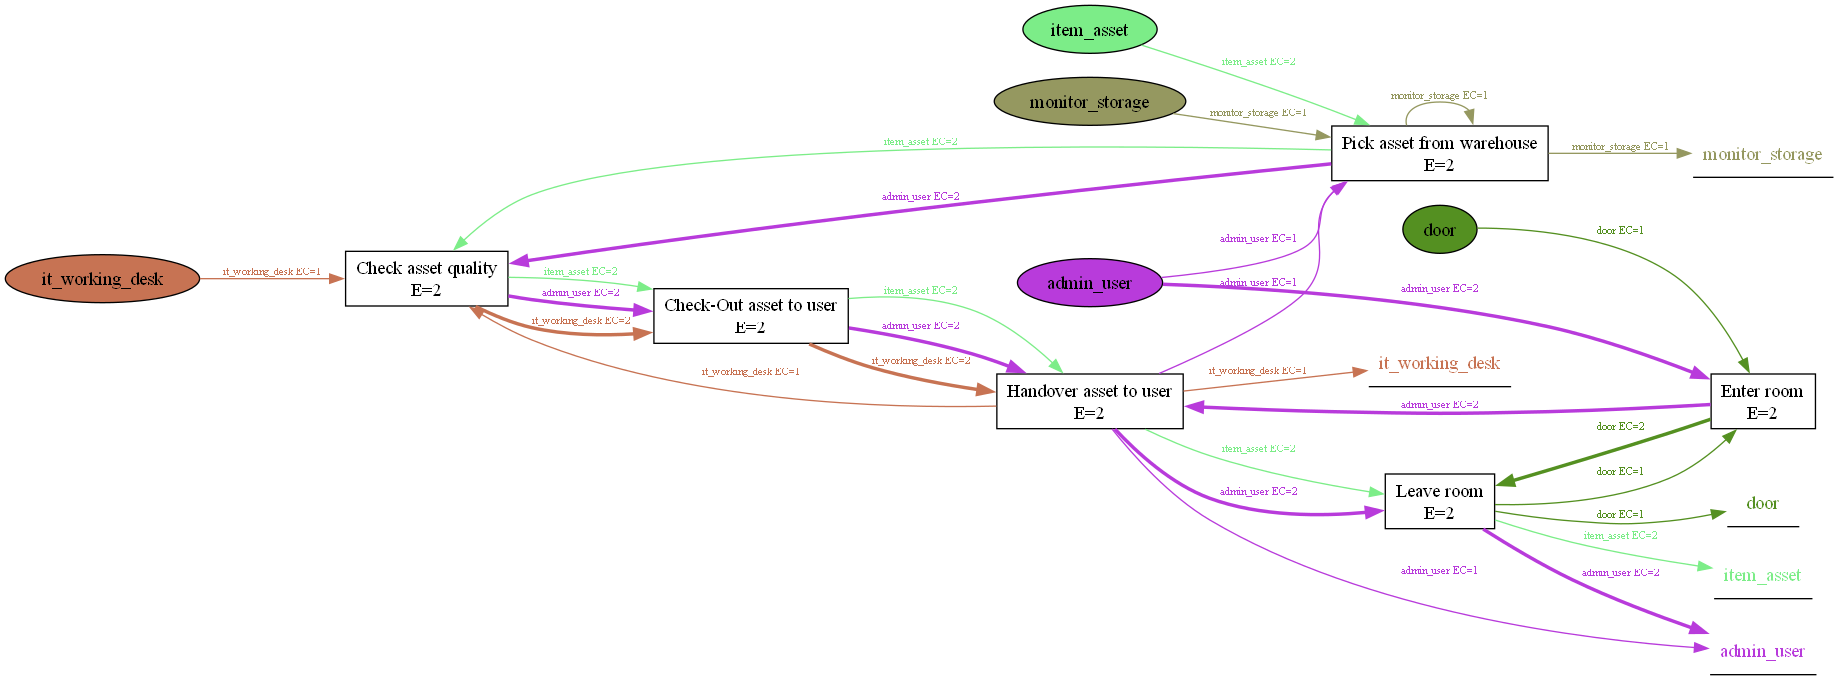

In [60]:
vis_write_ocel('12',True,False,'adtc',['H5','H7','C3','C9'],[])
# door and it_working_desk missed


read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene12_video_ocel_adtc.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

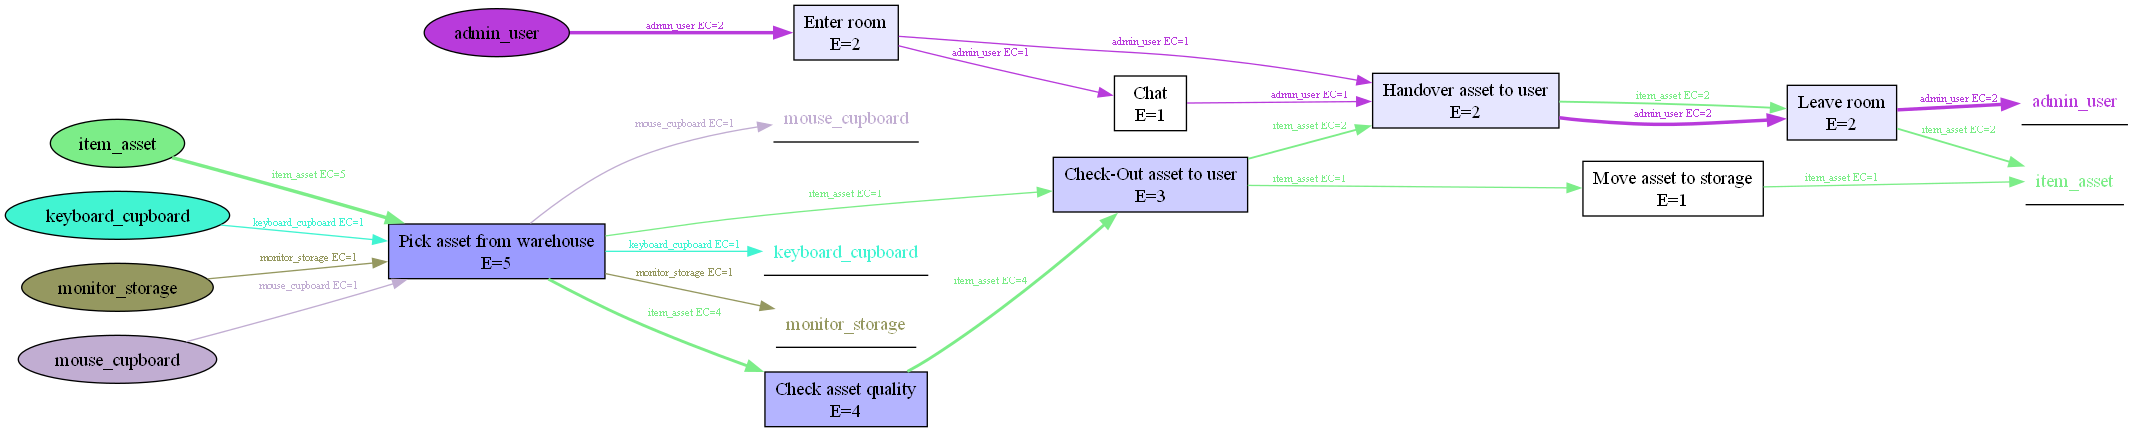

Object-Centric Event Log (number of events: 20, number of objects: 10, number of activities: 8, number of object types: 5, events-objects relationships: 33)
Activities occurrences: {'Pick asset from warehouse': 5, 'Check asset quality': 4, 'Check-Out asset to user': 3, 'Enter room': 2, 'Leave room': 2, 'Handover asset to user': 2, 'Chat': 1, 'Move asset to storage': 1}
Object types occurrences (number of objects): {'item_asset': 5, 'admin_user': 2, 'keyboard_cupboard': 1, 'mouse_cupboard': 1, 'monitor_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


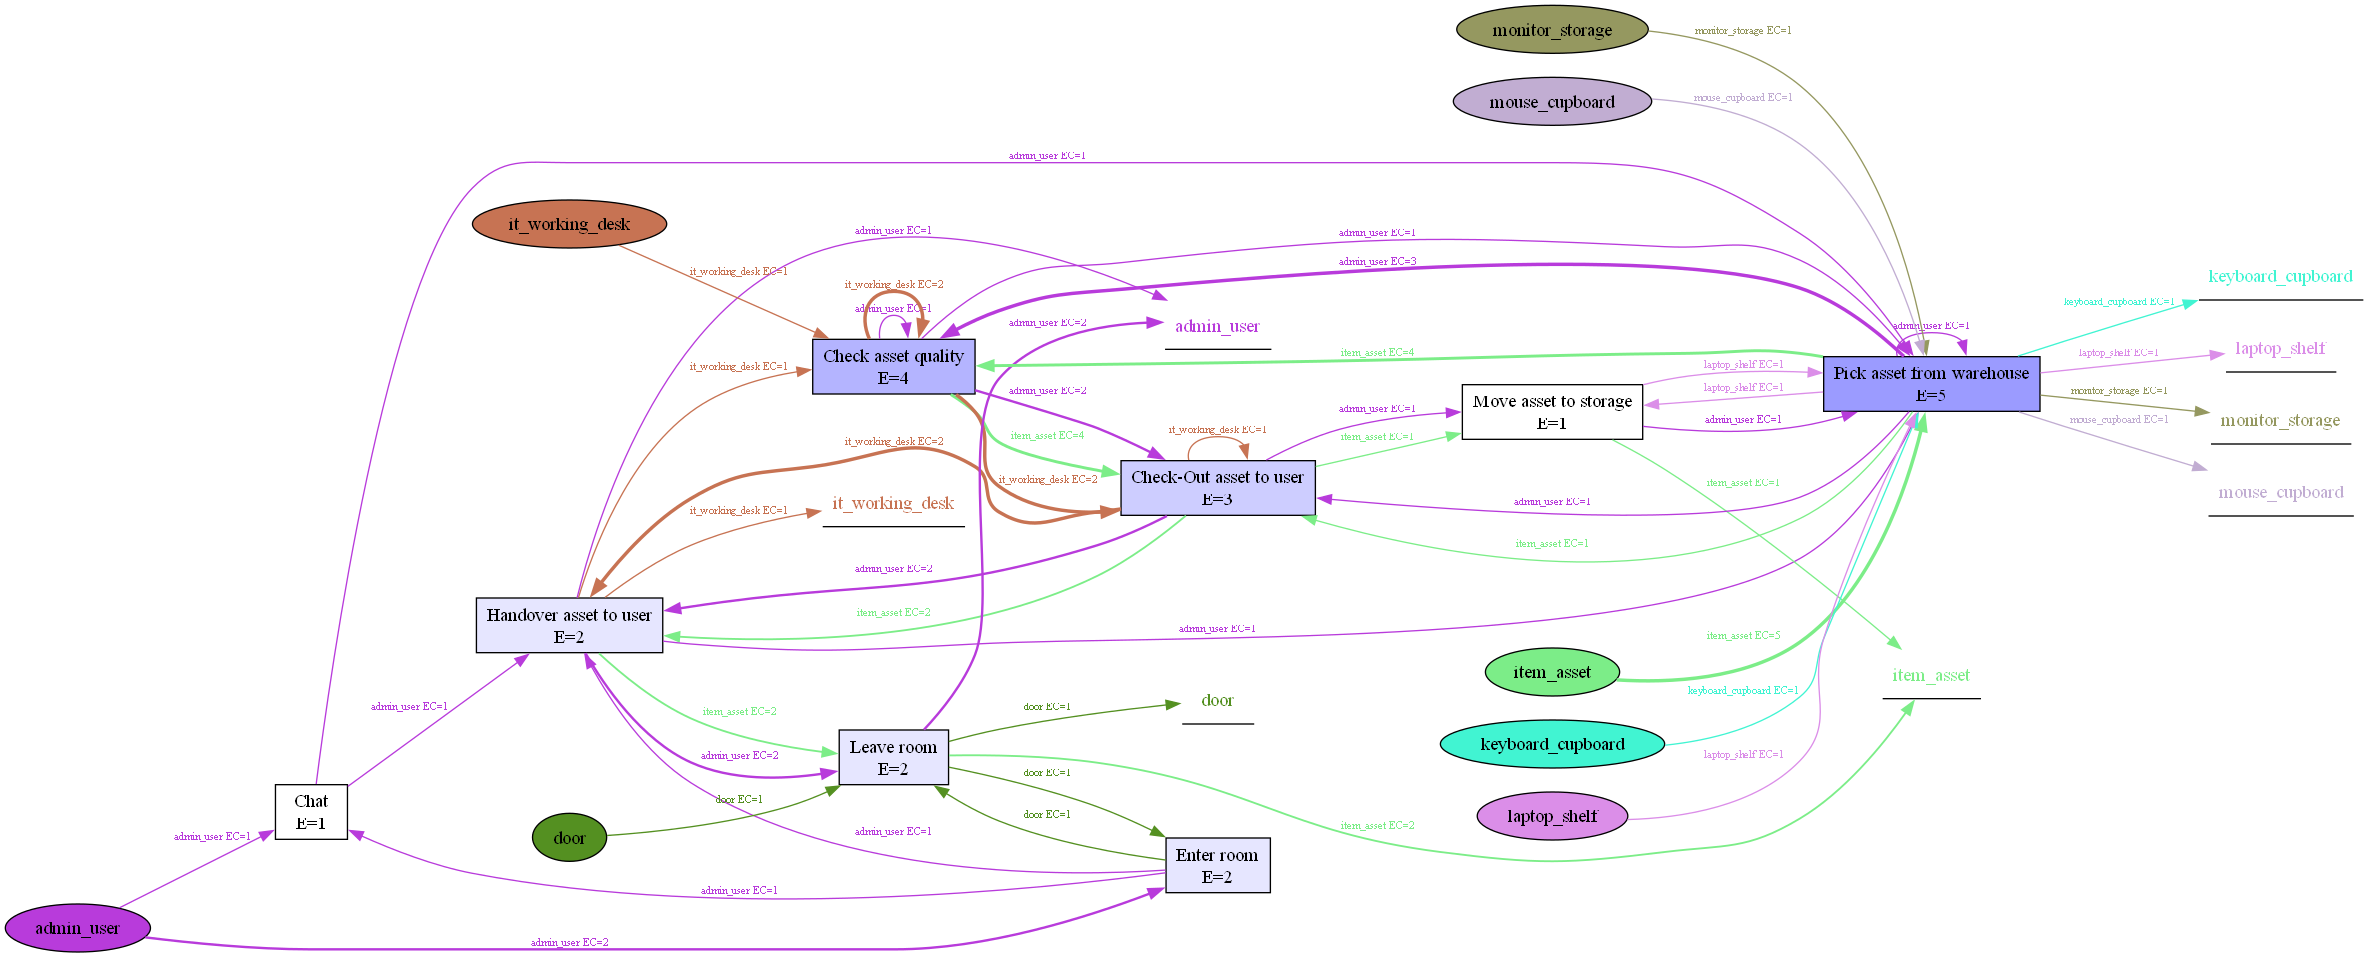

In [61]:
vis_write_ocel('13',True,False,'adtc',['L1', 'L3'],[])
# it_working_desk, door, laptop_shelf missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene13_video_ocel_adtc.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

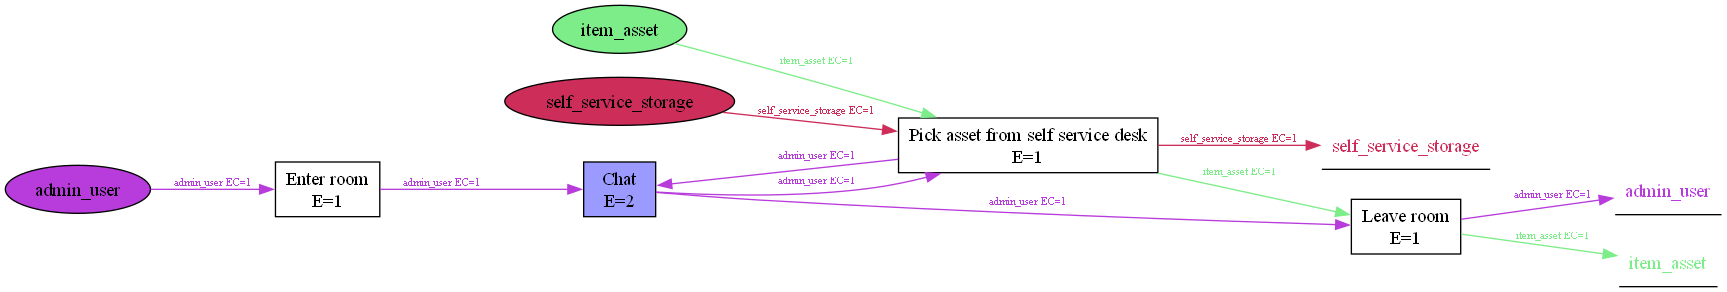

Object-Centric Event Log (number of events: 5, number of objects: 3, number of activities: 4, number of object types: 3, events-objects relationships: 8)
Activities occurrences: {'Chat': 2, 'Enter room': 1, 'Pick asset from self service desk': 1, 'Leave room': 1}
Object types occurrences (number of objects): {'admin_user': 1, 'item_asset': 1, 'self_service_storage': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


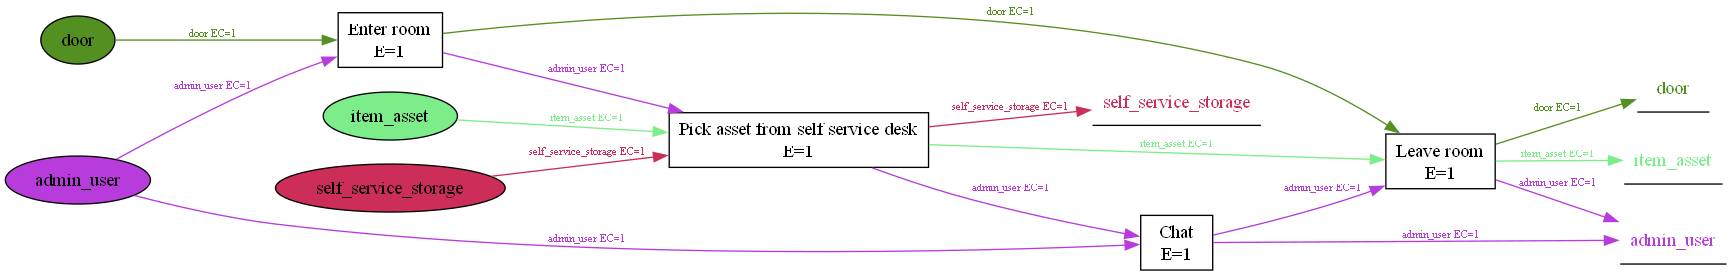

In [62]:
vis_write_ocel('14',True,False,'ssaco',['P1', 'P9', 'L3'],[])
# door missed
# one chat activity is assigned to another process -> exclude

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene14_video_ocel_ssaco.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)

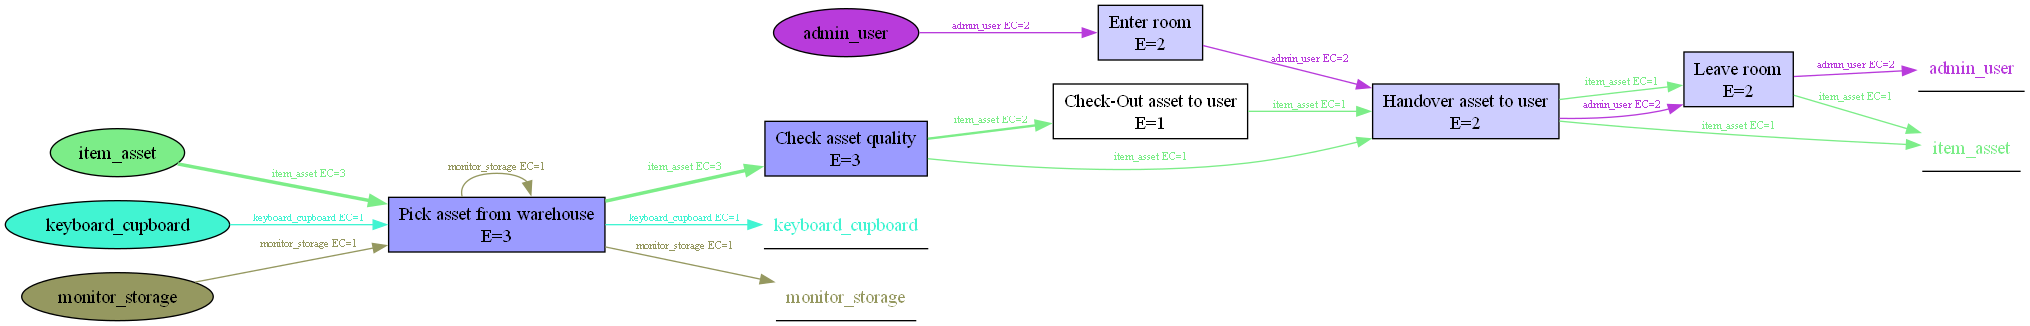

Object-Centric Event Log (number of events: 13, number of objects: 7, number of activities: 6, number of object types: 4, events-objects relationships: 22)
Activities occurrences: {'Pick asset from warehouse': 3, 'Check asset quality': 3, 'Enter room': 2, 'Handover asset to user': 2, 'Leave room': 2, 'Check-Out asset to user': 1}
Object types occurrences (number of objects): {'item_asset': 3, 'admin_user': 2, 'monitor_storage': 1, 'keyboard_cupboard': 1}
Please use <THIS>.get_extended_table() to get a dataframe representation of the events related to the objects.


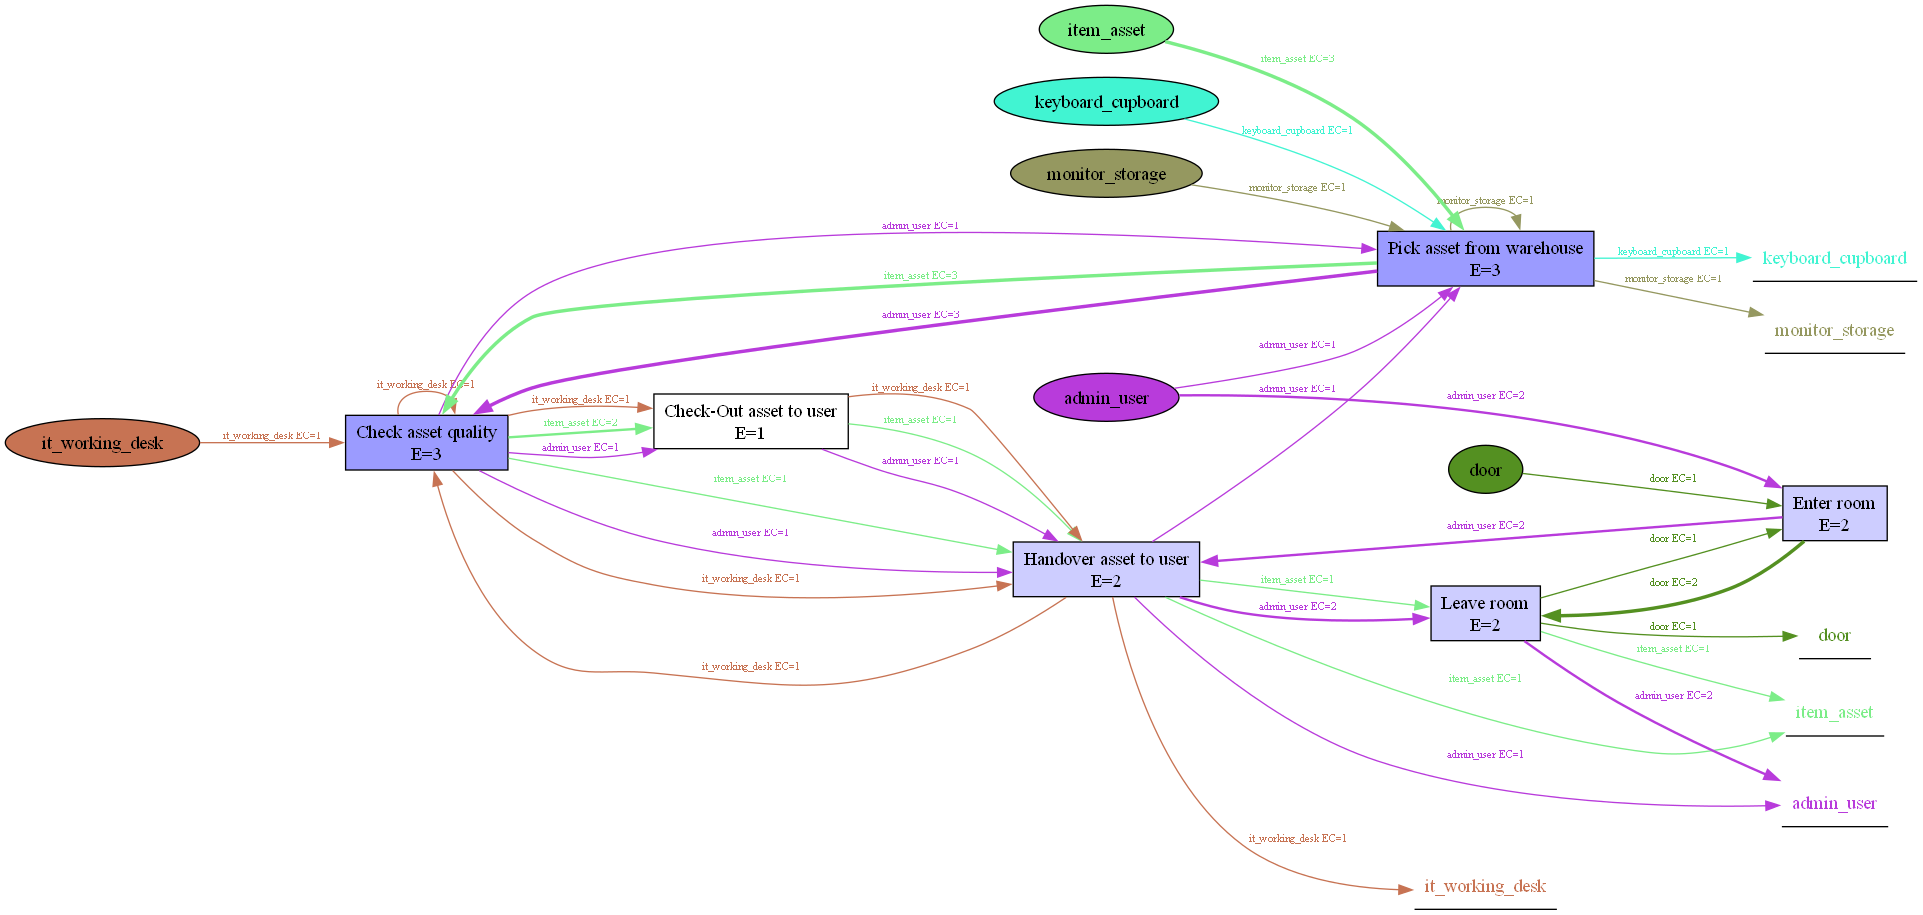

In [64]:
vis_write_ocel('15',True,False,'adtc',['P1', 'L6', 'C7'],[])
# door, it_working_desk missed

read_ocel = pm4py.read_ocel_json('../dataProcessing/filteredSceneVideoOCEL/filtered_scene15_video_ocel_adtc.jsonocel')
discover_ocel  = pm4py.ocel.discover_ocdfg(read_ocel)
vis_ocel = pm4py.vis.view_ocdfg(discover_ocel)